<a href="https://colab.research.google.com/github/marcelfin/CNN-KMeans-Color-Recognation/blob/main/version5_flo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import glob, os, cv2, sys, time, math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras import layers 
import seaborn as sns
import time
from PIL import Image
from tensorflow.python.client import device_lib
sns.set_theme(style="darkgrid")
sns.set()

%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [ ]:
tf.executing_eagerly()
img_height = 32
img_width = 32
batch_size = 3
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1548338711876729114
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9457971384738531372
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
#flowers
black = glob.glob('/content/drive/MyDrive/flower_dataset/black/*.*')
blue = glob.glob('/content/drive/MyDrive/flower_dataset/blue/*.*')
red = glob.glob('/content/drive/MyDrive/flower_dataset/red/*.*')
green = glob.glob('/content/drive/MyDrive/flower_dataset/green/*.*')
pink = glob.glob('/content/drive/MyDrive/flower_dataset/pink/*.*')
white = glob.glob('/content/drive/MyDrive/flower_dataset/white/*.*')
yellow = glob.glob('/content/drive/MyDrive/flower_dataset/yellow/*.*')

data = []
labels = []

In [ ]:
#cars
black = glob.glob('/content/drive/MyDrive/dataset_cars/black/*.*')
blue = glob.glob('/content/drive/MyDrive/dataset_cars/blue*.*')
red = glob.glob('/content/drive/MyDrive/dataset_cars/red/*.*')
green = glob.glob('/content/drive/MyDrive/dataset_cars/green/*.*')
pink = glob.glob('/content/drive/MyDrive/dataset_cars/pink*.*')
white = glob.glob('/content/drive/MyDrive/dataset_cars/white/*.*')
yellow = glob.glob('/content/drive/MyDrive/dataset_cars/yellow/*.*')

data = []
labels = []

In [ ]:

for i in black:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(32,32))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in blue:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(32,32))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in green:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(32,32))
    image=np.array(image)
    data.append(image)
    labels.append(2)

for i in pink:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(32,32))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in red:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(32,32))
    image=np.array(image)
    data.append(image)
    labels.append(4)
for i in white:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(32,32))
    image=np.array(image)
    data.append(image)
    labels.append(5)
for i in yellow:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(32,32))
    image=np.array(image)
    data.append(image)
    labels.append(6)

data = np.array(data)
labels = np.array(labels)

In [ ]:
for i in black:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(100,100))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in blue:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(100,100))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in green:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(100,100))
    image=np.array(image)
    data.append(image)
    labels.append(2)

for i in pink:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(100,100))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in red:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(100,100))
    image=np.array(image)
    data.append(image)
    labels.append(4)
for i in white:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(100,100))
    image=np.array(image)
    data.append(image)
    labels.append(5)
for i in yellow:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size=(100,100))
    image=np.array(image)
    data.append(image)
    labels.append(6)

data = np.array(data)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=45)
print('x_train_full shape: {}, y_train_full.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

x_train_full shape: (1955, 100, 100, 3), y_train_full.shape: (1955,)
x_test shape: (489, 100, 100, 3), y_test.shape: (489,)


In [ ]:
y_train_full = y_train_full.reshape(y_train_full.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train_full.shape, y_test.shape))

y_train_full shape: (1955,), y_test shape: (489,)


In [ ]:
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

x_train: (1564, 100, 100, 3), y_train: (1564,), x_val: (391, 100, 100, 3), y_val: (391,)


In [ ]:
idxs = np.random.randint(x_train.shape[0], size=1024)
images = x_train[idxs]
labels =  y_train[idxs]
classnames = ['black', 'blue', 'green', 'pink', 'red', 'white', 'yellow']


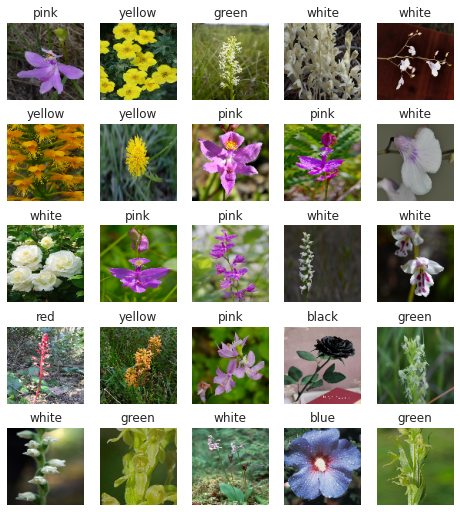

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])

plt.show()

In [ ]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(100,100,3)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
  model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(10, activation='relu'))
  model.add(tf.keras.layers.Activation('softmax'))
  model.summary()

  return model

In [ ]:
gpu_model = create_model()
gpu_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  loss=tf.keras.losses.sparse_categorical_crossentropy,
  metrics=[tf.keras.metrics.sparse_categorical_accuracy])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 33, 33, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 33, 33, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
batch_size=1024

history = gpu_model.fit(
    x_train, y_train, epochs=500, 
    steps_per_epoch=np.ceil(x_train.shape[0]/batch_size),
    validation_data = (x_val, y_val)
)


Epoch 1/500
2/2 [==============================] - 16s 708ms/step - loss: 3.7295 - sparse_categorical_accuracy: 0.1183 - val_loss: 7.6171 - val_sparse_categorical_accuracy: 0.2327
Epoch 2/500
2/2 [==============================] - 0s 281ms/step - loss: 2.4038 - sparse_categorical_accuracy: 0.2526 - val_loss: 2.9824 - val_sparse_categorical_accuracy: 0.3529
Epoch 3/500
2/2 [==============================] - 0s 276ms/step - loss: 2.0361 - sparse_categorical_accuracy: 0.3600 - val_loss: 2.8762 - val_sparse_categorical_accuracy: 0.1586
Epoch 4/500
2/2 [==============================] - 0s 265ms/step - loss: 1.8485 - sparse_categorical_accuracy: 0.4130 - val_loss: 2.5135 - val_sparse_categorical_accuracy: 0.1662
Epoch 5/500
2/2 [==============================] - 0s 278ms/step - loss: 1.6725 - sparse_categorical_accuracy: 0.4706 - val_loss: 2.3078 - val_sparse_categorical_accuracy: 0.1714
Epoch 6/500
2/2 [==============================] - 0s 266ms/step - loss: 1.5262 - sparse_categorical_acc

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 82.75141644477844 seconds


In [ ]:
def plot(losses, accuracies, subplot_title):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
  
  ax1.plot(losses)
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title(subplot_title[0])
  
  ax2.plot(accuracies)
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title(subplot_title[1])
    
  plt.show()

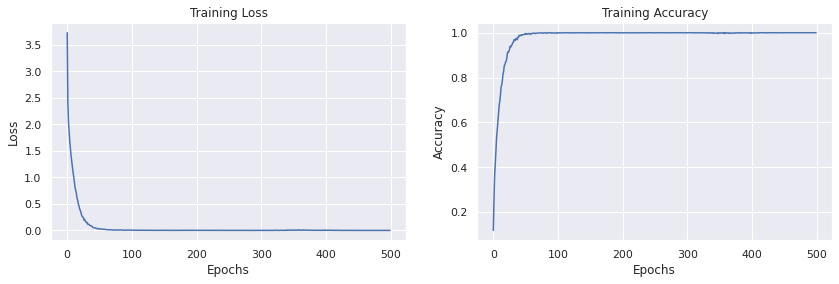

In [ ]:
plot(history.history['loss'], 
     history.history['sparse_categorical_accuracy'], 
     subplot_title=['Training Loss', 'Training Accuracy']
    )

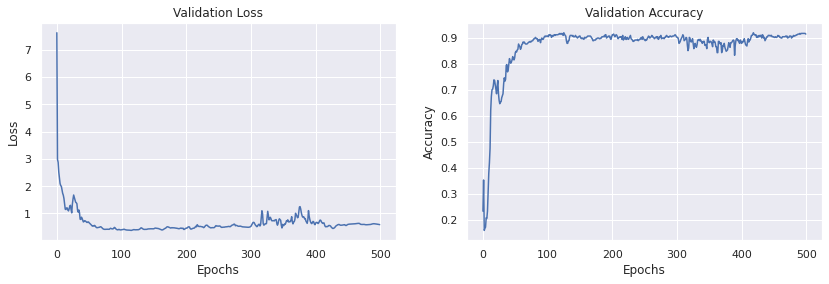

In [ ]:
# Validation
plot(history.history['val_loss'], 
     history.history['val_sparse_categorical_accuracy'], 
     subplot_title=['Validation Loss', 'Validation Accuracy']
    )

In [ ]:
gpu_model.save_weights('/content/drive/MyDrive/weights_car.h5', overwrite=True)



In [ ]:
gpu_model.save_weights('/content/drive/MyDrive/weights_flo.h5', overwrite=True)

In [ ]:
cpu_model = create_model()

cpu_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  loss=tf.keras.losses.sparse_categorical_crossentropy,
  metrics=[tf.keras.metrics.sparse_categorical_accuracy])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 33, 33, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 33, 33, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 33, 33, 64)       256       
 chNormalization)                                                
                                                      

In [ ]:
cpu_model.load_weights('/content/drive/MyDrive/weights_car.h5')

In [ ]:
cpu_model.load_weights('/content/drive/MyDrive/weights_flo.h5')

In [ ]:
idxs = np.random.randint(x_test.shape[0], size=1024)
images = x_test[idxs]

true_labels = y_test[idxs]

preds = np.argmax(cpu_model.predict(images), axis=1)

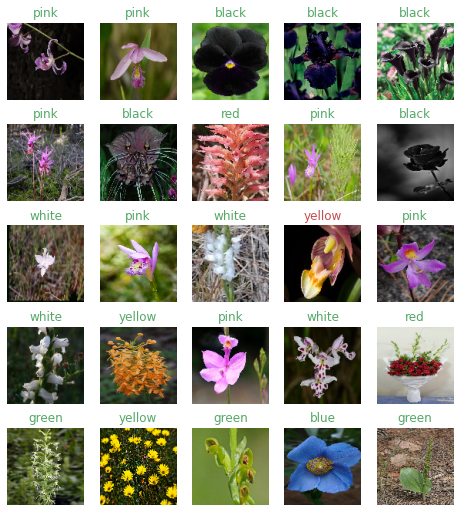

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = preds[i]
  color = 'g' if idx == true_labels[i] else 'r'
  ax.set_title(classnames[idx], color=color)

plt.show()

In [ ]:
model = cpu_model
test_predictions = model.predict(images)
print("shape is {}".format(test_predictions.shape))  
test_predictions

shape is (1024, 10)


array([[8.5501753e-12, 8.5501753e-12, 8.5501753e-12, ..., 8.5501753e-12,
        8.5501753e-12, 8.5501753e-12],
       [5.9623882e-11, 3.5120507e-09, 5.9623882e-11, ..., 5.9623882e-11,
        5.9623882e-11, 5.9623882e-11],
       [1.2243297e-13, 1.2243297e-13, 1.2243297e-13, ..., 1.2243297e-13,
        1.2243297e-13, 1.2243297e-13],
       ...,
       [3.7164768e-12, 3.7164768e-12, 3.7164768e-12, ..., 3.7164768e-12,
        3.7164768e-12, 3.7164768e-12],
       [3.2876113e-03, 4.8759637e-05, 4.8759637e-05, ..., 4.8759637e-05,
        4.8759637e-05, 4.8759637e-05],
       [5.0623342e-12, 5.0623342e-12, 1.0000000e+00, ..., 5.0623342e-12,
        5.0623342e-12, 5.0623342e-12]], dtype=float32)

In [ ]:

#actual_encoded_test_labels = np.argmax(y_train, axis=1) 
#Converting numpy array to pandas dataframe
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1) #Returns the indices of the maximum values along each row(axis=1)
#Converting numpy array to pandas dataframe
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Predicted Labels'])
actual_encoded_test_labels = pd.DataFrame(true_labels[0:1024], columns=['Actual Labels'])
#actual_encoded_test_labels

result = pd.concat([predicted_encoded_test_labels, actual_encoded_test_labels], axis=1, join='inner')
#result = pd.concat(frames)
display(result)

,Predicted Labels,Actual Labels
0,4,4
1,3,3
2,6,6
3,3,3
4,0,0
...,...,...
1019,5,6
1020,3,3
1021,6,6
1022,4,4


In [ ]:
cpu_model.evaluate(x=images, y=labels)

32/32 [==============================] - 0s 5ms/step - loss: 18.9594 - sparse_categorical_accuracy: 0.1787


[18.959362030029297, 0.1787109375]

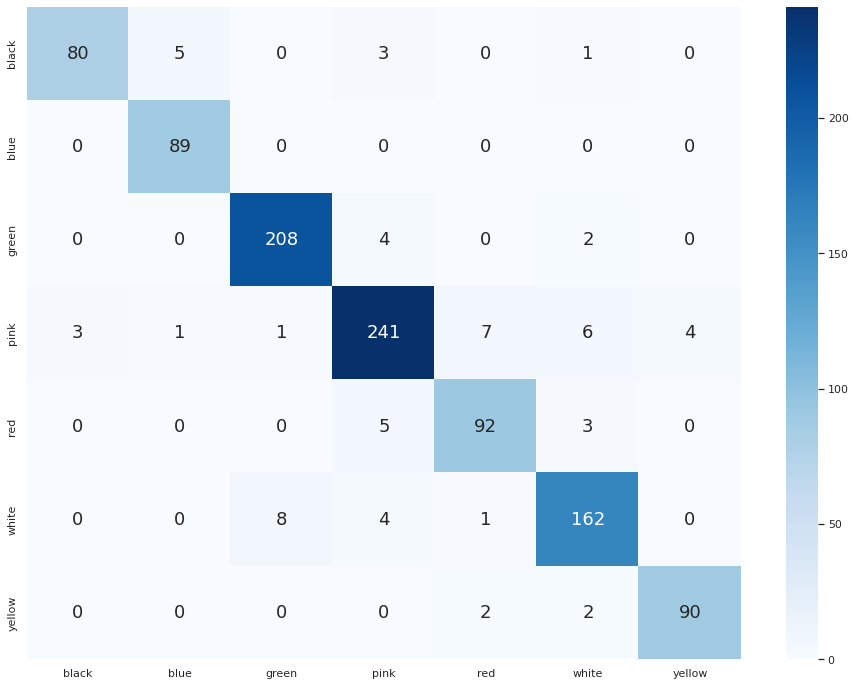

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
f,ax = plt.subplots(figsize=(16,12))
categories = classnames
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            annot_kws={"size": 18},
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

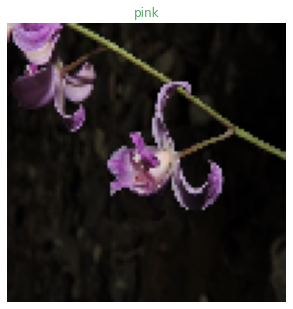

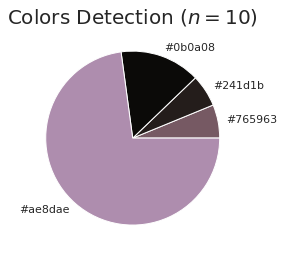

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(5,10),squeeze=False)
for i , ax in enumerate(axes.flat):
  
  # get_colors(get_image(images[i]), 8, True)
  ax.imshow(images[i])
  ax.axis('off')
  idx = preds[i]
  color = 'g' if idx == true_labels[i] else 'r'
  ax.set_title(classnames[idx], color=color)
  number_of_colors = 4
  image = images[i]
  modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  counts2 = Counter(labels).values()

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.show()

plt.title('Colors Detection ($n=10$)', fontsize=20)
# plt.figure(figsize = (8, 6))
plt.pie(counts2, labels = hex_colors, colors = hex_colors)
print(' ')
fig.tight_layout()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#склад